In [1]:
R.version.string
print("email: 'Maciek Sykulski'<macieksk@gmail.com>")
length(ls())

[1] "R version 3.3.3 (--)"

[1] "email: 'Maciek Sykulski'<macieksk@gmail.com>"


[1] 0

In [3]:
#projDir<-"/home/msykulski/msykulski/workspace/zgm/aneuploidy/"
projDir<-"/home/msykulski/workspace/genXone/hackyeah2019/"
projectPrefix<-"R_hackyeah2019"

#
load.sources<-function(){
    for (f in  c("utils.R" #Contains inpar, save_new_image, etc
                 #...  
                 ) 
        ){
    source(paste(projDir,"/src/",f,sep=""))
   }
}
load.sources()

In [3]:
#system.time(load(paste(projDir,"/r_saved_images/",projectPrefix,".Rdata",sep="")))
lsos()
gc()

,Type,Size,Rows,Columns
cpar,function,8904,NA,NA
load.sources,function,8448,NA,NA
read.table.into.db,function,7184,NA,NA
db.info,function,6200,NA,NA
multiloop,function,5376,NA,NA
postscript.call,function,4856,NA,NA
add.records.to.table,function,4704,NA,NA
save_new_image,function,4544,NA,NA
pdf.call,function,4528,NA,NA
inpar,function,3952,NA,NA


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,500212,26.8,940480,50.3,678252,36.3
Vcells,679334,5.2,1308461,10.0,861865,6.6


In [58]:
gc()
#system.time(save_new_image())

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,14926971,797.2,25102783,1340.7,25102783,1340.7
Vcells,134264703,1024.4,211778453,1615.8,211777762,1615.8


[1] "/home/msykulski/workspace/genXone/hackyeah2019//r_saved_images/R_hackyeah2019_2019-09-14_18_30_39.Rdata"


   user  system elapsed 
 44.045   0.666  44.721 

In [7]:
library(lattice)
#library(latticeExtra)
library(ggplot2)
#library(gplots)
#library(png)

#library(Hmisc)
library(cluster)
library(MASS)
library(reshape)
library(Matrix)
library(matrixStats)
library(text2vec)
library(tokenizers)

#library(lumi)
#library(lumiHumanIDMapping)
#library(lumiHumanAll.db)
#library(limma)

#library(annotate)
#library(GOstats)

#library(multtest)
#library(extrafont)
#library(enrichvs)
#library(statmod)
#library(flexmix)

load.sources()

sessionInfo()

R version 3.3.3 (--)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 9 (stretch)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] tokenizers_0.2.1   text2vec_0.5.1     matrixStats_0.55.0 Matrix_1.2-8      
 [5] reshape_0.8.8      MASS_7.3-45        cluster_2.0.5      ggplot2_3.2.1     
 [9] lattice_0.20-34    sqldf_0.4-11       RSQLite_2.1.2      gsubfn_0.7        
[13] proto_1.0.0        fastmatch_1.1-0    hash_2.2.6.1      

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3         mlapi_0.1.0        

In [238]:
#inpar(testp, ex( mean(rnorm(1000)) ) )
#cpar(testp)
#testp
#inpar(testp,ex({Sys.sleep(10); 1}))
#cpar(testp)
#testp
#kill.all.jobs()

[1] 0.0422968

In [9]:
data_dir<-paste0(projDir,"/jupyter_init_workspace/hackyeah_data_80/")
index<-read.table(paste0(data_dir,"INDEX"),stringsAsFactors=FALSE)

In [13]:
index_1<-read.table(paste0(data_dir,"INDEX_1"),stringsAsFactors=FALSE)
index_3<-read.table(paste0(data_dir,"INDEX_3"),stringsAsFactors=FALSE)
index_10<-read.table(paste0(data_dir,"INDEX_10"),stringsAsFactors=FALSE)

In [264]:
index_f100<-read.table(paste0(data_dir,"INDEX_F100"),stringsAsFactors=FALSE)

In [265]:
dim(index)
index[1,]

[1] 3590318       1

[1] "./501/5011c1cf5a47be37f92eb4f8a9793642f30c34b3"

In [ ]:

## https://cran.r-project.org/web/packages/text2vec/vignettes/glove.html


In [266]:
fset<-index_f100[,]
flines<-mclapply(fset,function(f)try(readLines(paste0(data_dir,f),n=-1,encoding="UTF-8",warn=FALSE)),mc.cores=44)
names(flines)<-fset
length(flines)
table(mcmapply(class,flines))      
flinesf100<-flines[mcmapply(class,flines,mc.cores=88)%fin%"character"]

[1] 70242


character 
    70242 

In [40]:
fset<-index_1[,]
flines<-mclapply(fset,function(f)try(readLines(paste0(data_dir,f),n=-1,encoding="UTF-8",warn=FALSE)),mc.cores=44)
names(flines)<-fset
length(flines)
table(mcmapply(class,flines))      
flines1<-flines[mcmapply(class,flines,mc.cores=44)%fin%"character"]

[1] 35903


character try-error 
    28736      7167 

In [43]:
#summary(mcmapply(class,flines,mc.cores=44)%fin%"character")
length(flines1)
length(flines3)

[1] 28736

[1] 87251

In [ ]:
#text8_file = "~/text8"
#if (!file.exists(text8_file)) {
#  download.file("http://mattmahoney.net/dc/text8.zip", "~/text8.zip")
#  unzip ("~/text8.zip", files = "text8", exdir = "~/")
#}
#wiki = readLines(text8_file, n = 1, warn = FALSE)

In [267]:
flines<-flinesf100
#tokens<-mclapply(flines,space_tokenizer,mc.cores=88)
tokens<-mclapply(flines,word_tokenizer,mc.cores=88)
#space_tokenizer(flines[[2]])
tokens_org<-tokens

In [269]:
tokens[[1]]
tokens[[1]][[1]]
#tolower(tokens[[1]][[5]])

[[1]]
[1] "2018.06"  "HEAD"     "my"       "array"    "3,7,9,11" "say"      "array"   
[8] "0,1"      "2"

[1] "2018.06"  "HEAD"     "my"       "array"    "3,7,9,11" "say"      "array"   
[8] "0,1"      "2"

In [270]:
eoftline<-rep("__GX1EOF__",5)
tokens<-mclapply(tokens_org,function(tk)c(lapply(tk,tolower),list(eoftline)))

In [271]:
tokens[[1]]

[[1]]
[1] "2018.06"  "head"     "my"       "array"    "3,7,9,11" "say"      "array"   
[8] "0,1"      "2"       

[[2]]
[1] "__GX1EOF__" "__GX1EOF__" "__GX1EOF__" "__GX1EOF__" "__GX1EOF__"

In [272]:
it <- itoken(do.call(c,tokens), progressbar = FALSE)
it

<itoken>
  Inherits from: <iterator>
  Public:
    chunk_size: 498421
    clone: function (deep = FALSE) 
    counter: 0
    ids: 000/0005c683654837f93fff74085799d16c40782f3c1 000/0005c6 ...
    initialize: function (iterable, ids = NULL, n_chunks = 10, progress_ = interactive(), 
    is_complete: active binding
    iterable: list
    length: active binding
    nextElem: function () 
    preprocessor: list
    progress: FALSE
    progressbar: NULL
    tokenizer: list

In [273]:
#create_vocabulary
RcppParallel::setThreadOptions(numThreads = 80) ##Doesn't seem to improve much here
system.time(vocab <- create_vocabulary(it))
vocab_all<-vocab

   user  system elapsed 
 20.642   1.271  21.915 

In [274]:
#?prune_vocabulary
#prune_vocabulary(vocabulary, term_count_min = 1L, term_count_max = Inf,
#  doc_proportion_min = 0, doc_proportion_max = 1, doc_count_min = 1L,
#  doc_count_max = Inf, vocab_term_max = Inf)
head(vocab_all)
dim(vocab_all)

,term,term_count,doc_count
,<chr>,<int>,<int>
2,froterujmyż,1,1
4,thisoffset,1,1
5,state.castingmode:options,1,1
8,scudzoziemczaną,1,1
10,dgx43kd5,1,1
11,eke3lckbwfcrssopndxfc6o1jlukyylp8b6dnfz5wufzuaquzn13n3balcg5,1,1


[1] 1802703       3

In [275]:
vocab <- prune_vocabulary(vocab_all, term_count_min = 2L)
#vocab <- prune_vocabulary(vocab_all, term_count_min = 5L)
head(vocab)
dim(vocab)

,term,term_count,doc_count
,<chr>,<int>,<int>
1,launchcliente,2,2
3,zdecydowała,2,2
6,arrays.deepequals,2,2
28,lerp2,2,2
30,spicula's,2,2
48,0.084681,2,2


[1] 616146      3

In [276]:
# Use our filtered vocabulary
vocab<-vocab_all
vectorizer <- vocab_vectorizer(vocab)
# use window of 5 for context words
system.time(tcm <- create_tcm(it, vectorizer, skip_grams_window = 5L))

   user  system elapsed 
 33.125   1.892  35.018 

In [277]:
glove <- GlobalVectors$new(word_vectors_size = 100, learning_rate = 0.13, vocabulary = vocab, x_max = 10)

In [ ]:
RcppParallel::setThreadOptions(numThreads = 88)
system.time(glove$fit_transform(tcm, n_iter = 80))
# `glove` object will be modified by `fit()` call !
#fit(tcm, glove, n_iter = 20)

In [ ]:
#system.time(word_vectors <- glove$get_word_vectors())
word_vectors <- glove$components

In [ ]:
dim(word_vectors)

word_vectors[,"dirty"]

In [241]:
summary(colSums(word_vectors))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-14.3900  -1.7850   0.1694   0.1655   2.1130  13.6800 

In [253]:
head(colnames(word_vectors),20)

[1] "bodyposition.p"            "38.159268"                
 [3] "confusões"                 "zdecydowała"              
 [5] "builder.setpositivebutton" "arduino2"                 
 [7] "ℭ𝔩𝔲𝔟"                      "val_loss.item"            
 [9] "zabraliście"               "a420_10le"                
[11] "2,9,6,16,16,15"            "chanyeol"                 
[13] "this.enabled"              "niewężykowata"            
[15] "bkp_string"                "ciric"                    
[17] "razroznjennyje"            "547383439920986228"       
[19] "77321"                     "käima:d"

In [152]:
?sim2

In [ ]:
#sim_dirty<-sim2(t(word_vectors),t(word_vectors[,"king",drop=FALSE]),method="cosine",norm="l2")
sim_dirty<-cor(word_vectors,word_vectors[,"dirty",drop=FALSE]) #,method="cosine",norm="l2")


In [ ]:
sim_dirty[order(sim_dirty[,1],decreasing=TRUE)[1:10],]

In [94]:
berlin <- word_vectors["paris", , drop = FALSE] - 
  word_vectors["france", , drop = FALSE] + 
  word_vectors["germany", , drop = FALSE]

ERROR: Error in word_vectors["paris", , drop = FALSE]: subscript out of bounds


In [6]:
df_5w15 <- read.csv("../../datadirs/20180712_1240_Sample_genxone_poznan_microb_s221-223,171x3,172-173x2,178,179_16s_kp176_MN107_SLSK108/debarcoded.BC12/BC12.blastn.n5w15.classification.filtered.top1.tsv",
         header = FALSE, sep = "\t", quote = "\"", dec = ".", fill = TRUE)   
df_5w10 <- read.csv("../../datadirs/20180712_1240_Sample_genxone_poznan_microb_s221-223,171x3,172-173x2,178,179_16s_kp176_MN107_SLSK108/debarcoded.BC12/BC12.blastn.n5w10.classification.filtered.top1.tsv",
         header = FALSE, sep = "\t", quote = "\"", dec = ".", fill = TRUE)   
df_500w15 <- read.csv("../../datadirs/20180821_1504_Sample_genxone_poznan_microb_s266-283,296-304_16s_kp182_MN107_SLSK108/debarcoded.BC01/n500w15e3/BC01.blastn.n500w15.classification.filtered.top1.tsv",
         header = FALSE, sep = "\t", quote = "\"", dec = ".", fill = TRUE)  

Warning message in file(file, "rt"):
“cannot open file '../../datadirs/20180712_1240_Sample_genxone_poznan_microb_s221-223,171x3,172-173x2,178,179_16s_kp176_MN107_SLSK108/debarcoded.BC12/BC12.blastn.n5w15.classification.filtered.top1.tsv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [8]:
df_5w15.stat <- read.csv("../../datadirs/20180712_1240_Sample_genxone_poznan_microb_s221-223,171x3,172-173x2,178,179_16s_kp176_MN107_SLSK108/debarcoded.BC12/BC12.blastn.n5w15.classification.filtered.top1.stat.tsv",
         header = FALSE, sep = "\t", quote = "\"", dec = ".", fill = TRUE)   
df_5w10.stat <- read.csv("../../datadirs/20180712_1240_Sample_genxone_poznan_microb_s221-223,171x3,172-173x2,178,179_16s_kp176_MN107_SLSK108/debarcoded.BC12/BC12.blastn.n5w10.classification.filtered.top1.stat.tsv",
         header = FALSE, sep = "\t", quote = "\"", dec = ".", fill = TRUE)  


In [9]:
colnames(df_5w15) <- c("read_id_15","info_15","taxid","bit_score_15","len_15","qlen_15","mismatch_15")
colnames(df_5w10) <- c("read_id_10","info_10","taxid","bit_score_10","len_10","qlen_10", "mismatch_10")

#aniqseqid sseqid staxids bitscore length qlen mismatch
#df_5w15.sort <- df_5w15[order(df_5w15$taxid),]
#df_5w10.sort <- df_5w10[order(df_5w10$taxid),]
#taxid count max score


In [10]:
colnames(df_5w15.stat) <- c("taxid","count_15","mean_bit_score_15", "median_bit_score_15", "mean_len_15","median_len_15")
colnames(df_5w10.stat) <- c("taxid","count_10","mean_bit_score_10", "median_bit_score_10", "mean_len_10","median_len_10")

In [11]:
df <- merge(df_5w10.stat, df_5w15.stat, by.df_5w10.stat = "taxid", by.df_5w15.stat = "taxid")

colnames(df)

[1] "taxid"               "count_10"            "mean_bit_score_10"  
 [4] "median_bit_score_10" "mean_len_10"         "median_len_10"      
 [7] "count_15"            "mean_bit_score_15"   "median_bit_score_15"
[10] "mean_len_15"         "median_len_15"

In [12]:
mean(df[["mean_bit_score_10"]])
mean(df[["mean_bit_score_15"]])

[1] 646.3455

[1] 645.7039

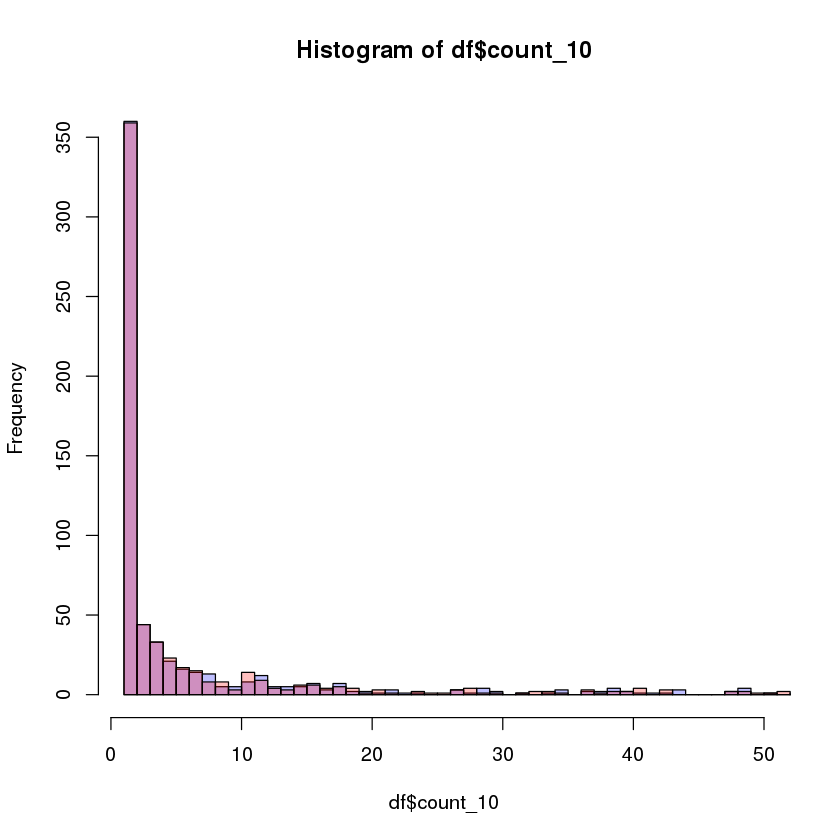

In [13]:
hist(df$count_10,xlim=c(1,50),breaks=12000,col=rgb(0,0,1,1/4))
hist(df$count_15,xlim=c(1,50),breaks=12000,col=rgb(1,0,0,1/4),add=T)

In [14]:
#table(df$count_10)
#table(df$count_15)

In [15]:
summary(df$mean_bit_score_15)
summary(df$mean_bit_score_10)
summary(df$median_bit_score_15)
summary(df$median_bit_score_10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   41.7   375.0   653.0   645.7   899.9  1938.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   41.7   369.8   653.0   646.3   901.8  1938.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   41.7   351.0   640.5   644.1   917.5  1938.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   41.7   351.5   640.5   645.3   918.6  1938.0 

In [16]:
sum(df_5w15$len_15)
sum(df_5w10$len_10)
sum(df_5w15$mismatch_15)
sum(df_5w10$mismatch_10)

[1] 71977128

[1] 71985240

[1] 5198672

[1] 5199705

In [22]:
#diff(as.integer(df_5w15$bit_score_15),as.integer(df_5w10$bit_score_10))
#sum(as.integer(df$bit_score_15)+as.integer(df$bit_score_10))
df<-transform(df, dif_mean=abs(round(((mean_bit_score_15-mean_bit_score_10)/(mean_bit_score_15+mean_bit_score_10)*100),5)))
df<-transform(df, dif_median=abs(round(((median_bit_score_15-median_bit_score_10)/(median_bit_score_15+median_bit_score_10)*100),5)))
df


,taxid,count_10,mean_bit_score_10,median_bit_score_10,mean_len_10,median_len_10,count_15,mean_bit_score_15,median_bit_score_15,mean_len_15,median_len_15,dif_mean,dif_median
263,91061,2,283.0000,283.00,411.0000,411.0,1,100.0000,100.0,58.00000,58.0,47.78068,47.78068
395,338193,1,279.0000,279.00,504.0000,504.0,2,200.0000,200.0,415.00000,415.0,16.49269,16.49269
41,1302,3,1217.6667,1275.00,1239.0000,1379.0,2,977.5000,977.5,1139.00000,1139.0,10.94070,13.20755
265,94868,12,663.9167,557.50,780.6667,651.5,11,533.1818,298.0,619.00000,366.0,10.92098,30.33314
252,84037,14,498.3571,377.50,740.5714,658.0,12,407.4167,269.0,645.83333,299.5,10.04009,16.78268
176,37659,8,729.2500,841.00,925.5000,1133.5,7,611.4286,640.0,824.00000,956.0,8.78819,13.57191
139,29364,3,822.3333,767.00,1228.0000,1439.0,4,719.7500,688.5,1102.75000,1116.5,6.65226,5.39334
181,38304,5,1213.6000,1175.00,1164.4000,1316.0,4,1068.0000,1021.0,1118.00000,1232.0,6.38149,7.01275
413,371674,4,692.2500,664.50,1044.7500,1178.5,3,612.0000,518.0,1007.00000,1199.0,6.15296,12.38901
617,1506553,39,903.0000,1011.00,1082.3077,1337.0,34,816.4118,901.5,1005.02941,1243.0,5.03592,5.72549


In [25]:
df_mean <- df[order(-df$dif_mean),]
df_median <- df[order(-df$dif_median),]

In [44]:
a <- df_mean[1:20,]
a <- rbind(a,df_median[1:20,])
unique(a)
unique(a[,1])

,taxid,count_10,mean_bit_score_10,median_bit_score_10,mean_len_10,median_len_10,count_15,mean_bit_score_15,median_bit_score_15,mean_len_15,median_len_15,dif_mean,dif_median
599,1432052,1,158.0000,158.0,132.0000,132.0,2,500.5000,500.5,726.5000,726.5,52.01215,52.01215
263,91061,2,283.0000,283.0,411.0000,411.0,1,100.0000,100.0,58.0000,58.0,47.78068,47.78068
127,28221,1,135.0000,135.0,164.0000,164.0,2,218.5000,218.5,315.0000,315.0,23.62093,23.62093
395,338193,1,279.0000,279.0,504.0000,504.0,2,200.0000,200.0,415.0000,415.0,16.49269,16.49269
634,1648214,1,549.0000,549.0,773.0000,773.0,2,760.5000,760.5,974.0000,974.0,16.15120,16.15120
108,1730,1,193.0000,193.0,306.0000,306.0,2,244.5000,244.5,399.0000,399.0,11.77143,11.77143
41,1302,3,1217.6667,1275.0,1239.0000,1379.0,2,977.5000,977.5,1139.0000,1139.0,10.94070,13.20755
265,94868,12,663.9167,557.5,780.6667,651.5,11,533.1818,298.0,619.0000,366.0,10.92098,30.33314
252,84037,14,498.3571,377.5,740.5714,658.0,12,407.4167,269.0,645.8333,299.5,10.04009,16.78268
36,1267,8,557.2500,561.0,677.7500,698.0,9,666.7778,566.0,754.8889,770.0,8.94814,0.44366


[1] 1432052   91061   28221  338193 1648214    1730    1302   94868   84037
[10]    1267   37659   29347   29364   38304  371674 1211817 1506553 1096246
[19] 1157312 1720294    1305  115544    1561   33034  290052